Shreyas Vaderiyattil, Ritvik Singh, Shiv Rathod

Introduction

Formula One is an international racing league that gathers the top drivers from around the world and they compete against each other using one of the fastest cars built for racing on circuits around the world. In this tutorial we will be analyizing the lap times of various drivers as well as their pit stop times. In addition, we will take a look at these timings and compare it to their qualified place for the race and see if a driver would place above or below their qualified time.

Predicting what place a driver can place is important to not only the racing team and driver but also fans that follow the sport. Racing teams and drivers find this useful for their approach and strategy for the race. This can help with fast decisions that are needed during a race between the driver and the team.


Processing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime


In [2]:
circuit_data = pd.read_csv('circuits.csv')
driver_data = pd.read_csv('drivers.csv')
lap_data = pd.read_csv('lap_times.csv')
pit_data = pd.read_csv('pit_stops.csv')
quali_data = pd.read_csv('qualifying.csv')
race_data = pd.read_csv('races.csv')
result_data = pd.read_csv('results.csv')


In [3]:
circuit_data.head()


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


We have circuit data to extract the circuitId needed for analysis. 
In this dataset we have data for what type of circuit, location, and its longitude and latitude.

In [4]:
driver_data.head()


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


We have driver data to extract the drivers that have raced on the circuits that we are analyzing. 
Driver data outputs the driver, their number, name, DOB, and nationality.

In [5]:
lap_data.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


We have extracted lap_data for analysis on lap times per driver for each race. This dataset outputs which lap, what position, and the time.

In [6]:
pit_data.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


We have extracted pit stop data for analysis on how this timing can affect what positon a driver finishes in. This dataset provides which lap the driver pitted in and how long the pit stop was.

In [7]:
quali_data.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


Qualifying data provides times as well as the position the driver starts in at the end of qualifiying. Q1, Q2, Q3 are provided as well as the race and driver id.

In [8]:
race_data.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


The race dataset provides a given race as well as the circuit that given race happened as well as the date for analysis. 

In [9]:
result_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Lastly, we have the results dataset. This dataset provides the race, drive id as well as their starting and ending position. This dataset will help with training our data for later machine learning analysis on starting and ending positons. 

Our first task is to have all of our datasets be filtered between 2016-2021.
We first want to filter the data for all the datasets to contain races between the years 2016-2021 for our analysis. We then want to extract all the circuits that were raced on between this time frame.
This process is repeated for the rest of the datasets.

In [10]:
# Retrieve all races that are between 2016 and 2021
new_race_data = race_data[(race_data['year'] >= 2016)]

# Extract the circuits that were raced on in this time frame
unique_circuits = race_data['circuitId'].unique()
new_circuit_data = circuit_data[np.isin(circuit_data['circuitId'], unique_circuits)]

# Extract the results of the races between the time frame
new_result_data = result_data[np.isin(result_data, new_race_data['raceId'])]

# Extract the drivers that raced in this time frame
new_driver_data = driver_data[np.isin(driver_data, new_result_data['driverId'])]

# Extract lap_times for each race in this time frame
new_lap_data = lap_data[np.isin(lap_data, new_race_data['raceId'])]

# Extract pit data for each race in this time frame
new_pit_data = pit_data[np.isin(pit_data, new_race_data['raceId'])]

# Extract quailifying time data from each race in this time frame
new_quali_data = quali_data[np.isin(quali_data, new_race_data['raceId'])]

Now that we have filtered each dataset to fit our current time frame we can now visualize the datasets. We will first look into visualizing a drivers average pit stop time per race and the difference between their starting and ending position.
We will be analyzing 3 drivers during 3 different time periods and see average pit stop time vs. difference in position.

In [11]:
new_driver_data

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
10,11,sato,\N,SAT,Takuma,Sato,1977-01-28,Japanese,http://en.wikipedia.org/wiki/Takuma_Sato
12,13,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
13,14,coulthard,\N,COU,David,Coulthard,1971-03-27,British,http://en.wikipedia.org/wiki/David_Coulthard
14,15,trulli,\N,TRU,Jarno,Trulli,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli


In [12]:
# We will sample drivers that are known to race almost every race for better analysis driverId = 1,4,20
# Lewis Hamilton is driverId = 1 and we will analyze his 2016 pit stop times

# Extract all races in 2016 
hamilton_races = new_race_data[(new_race_data['year'] == 2016)]
# Extract pit times where the driverId equals Hamiltons
hamilton_pit_times = pit_data[(pit_data['driverId'] == 1)]
# Filter the pit times with times that are only in 2016
hamilton_pit_times = hamilton_pit_times[np.isin(hamilton_pit_times, hamilton_races['raceId'])]

# Convert time in milliseconds to seconds and place in new column
hamilton_pit_times['new_time'] = hamilton_pit_times['milliseconds'].astype(float) / 1000
# Find the mean per raceId of the pit stop times 
hamilton_pit_times = hamilton_pit_times.groupby('raceId', as_index=False)['new_time'].mean()
hamilton_pit_times

# Now we must find the difference in positions of each race in 2016 for Hamilton
difference = []
# Create a temp that will filter out all the race Ids
temp = new_result_data[np.isin(new_result_data, hamilton_pit_times['raceId'])]
# Make a new dataframe that will have all the races for Hamilton
hamilton_difference = temp[(temp['driverId'] == 1)]

hamilton_difference = hamilton_difference[['raceId','grid','position']]
# If a driver does not finish a race they will have a default position of 22 to compensate
hamilton_difference['position'] = hamilton_difference ['position'].replace('\\N', '22')
# Create a new column which shows the difference in starting and ending position
hamilton_difference['difference'] = hamilton_difference['grid'].astype(float) - hamilton_difference['position'].astype(float)

new_index = list(range(0, len(hamilton_pit_times)))
hamilton_difference.index = new_index

# Statistically remove outliers for better data visualization using IQR test
for time in hamilton_pit_times['new_time']:
    Q1 = hamilton_pit_times.quantile(0.01)
    Q3 = hamilton_pit_times.quantile(0.8)
    IQR = Q3.new_time - Q1.new_time

    if time > (Q3.new_time + 1.5 * IQR):
        # Drop row if the time is an outlier
        index = hamilton_pit_times[hamilton_pit_times.new_time == time].index
        hamilton_pit_times.drop(index, inplace=True)
        hamilton_difference.drop(index, inplace=True)


hamilton_pit_times



,raceId,new_time
1,949,24.688667
2,950,24.425200
3,951,30.001000
4,953,26.315000
5,954,22.243000
6,955,20.108000
7,956,20.181500
8,957,29.535500
9,958,21.607000
10,959,18.543000


In [13]:
hamilton_difference

,raceId,grid,position,difference
1,949,1,3,-2.0
2,950,22,7,15.0
3,951,10,2,8.0
4,953,3,1,2.0
5,954,1,1,0.0
6,955,10,5,5.0
7,956,1,1,0.0
8,957,1,1,0.0
9,958,2,1,1.0
10,959,2,1,1.0


After tidying up the data for Lewis Hamilton Pit stop times in 2016 as well as position differences we can now plot on a scatter plot Pit Stop Time in Seconds vs. Starting and Ending position difference. This will allow us to see if there is more positive difference in position when his pit stop time is smaller and a more negative difference if his pit stop time is larger.

Text(0, 0.5, 'Ending Position - Starting Position')

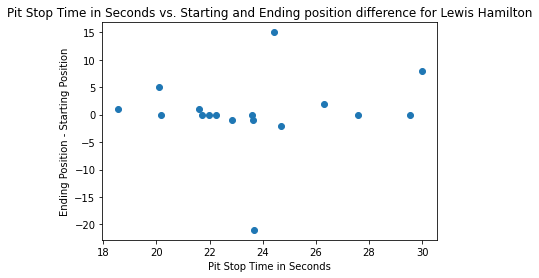

In [14]:

plt.scatter(hamilton_pit_times['new_time'], hamilton_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Lewis Hamilton")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')